In [1]:
## Data Analysis Phase

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## display all the colums of the dataframe 
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('Property_Price_Train.csv')
print(dataset.shape)


(1459, 81)


In [3]:
dataset.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values

features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
# 2- step print the feature name and the percentage of missing valuesz
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),' % missing values')

Lot_Extent 0.1775  % missing values
Lane_Type 0.9376  % missing values
Brick_Veneer_Type 0.0055  % missing values
Brick_Veneer_Area 0.0055  % missing values
Basement_Height 0.0254  % missing values
Basement_Condition 0.0254  % missing values
Exposure_Level 0.026  % missing values
BsmtFinType1 0.0254  % missing values
BsmtFinType2 0.026  % missing values
Fireplace_Quality 0.4722  % missing values
Garage 0.0555  % missing values
Garage_Built_Year 0.0555  % missing values
Garage_Finish_Year 0.0555  % missing values
Garage_Quality 0.0555  % missing values
Garage_Condition 0.0555  % missing values
Pool_Quality 0.9952  % missing values
Fence_Quality 0.8074  % missing values
Miscellaneous_Feature 0.963  % missing values


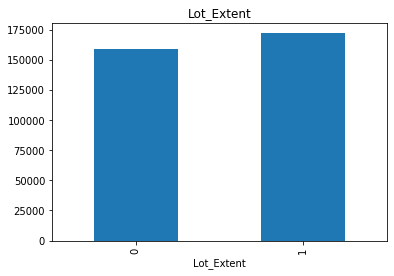

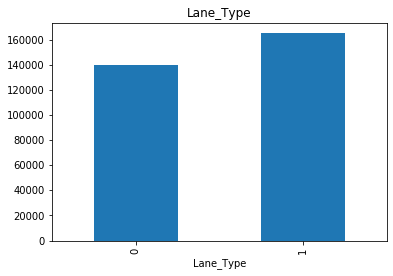

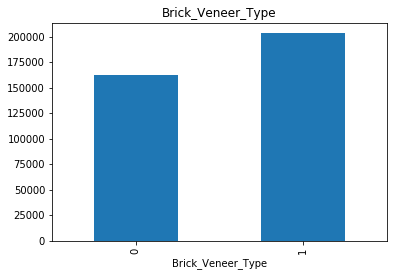

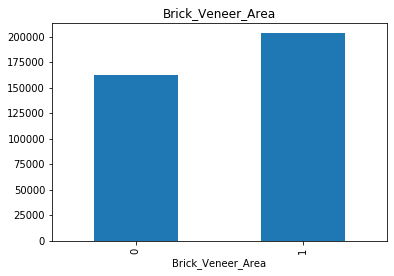

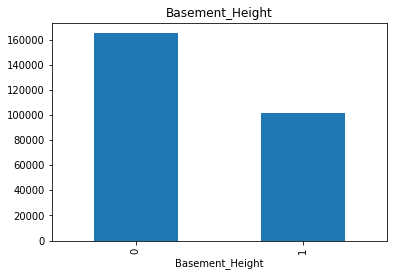

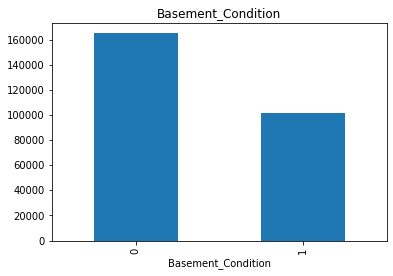

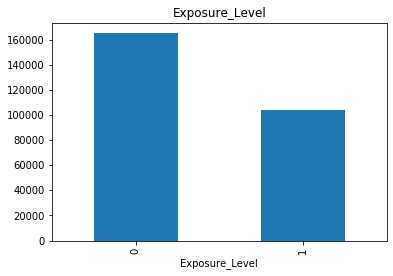

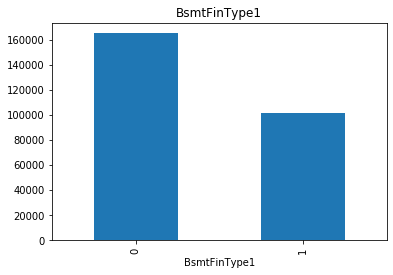

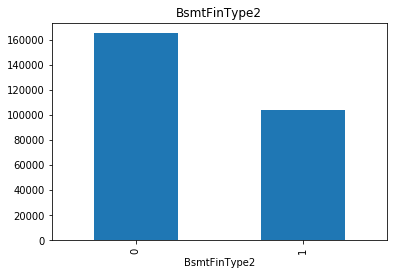

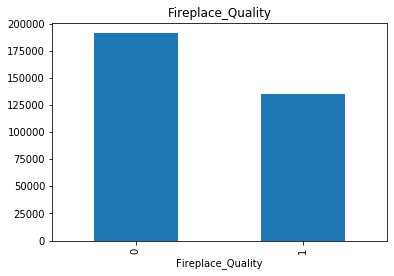

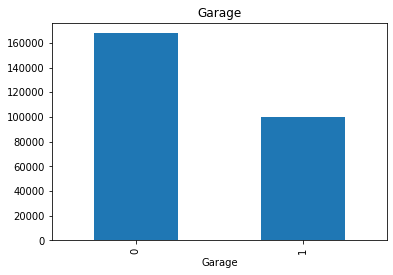

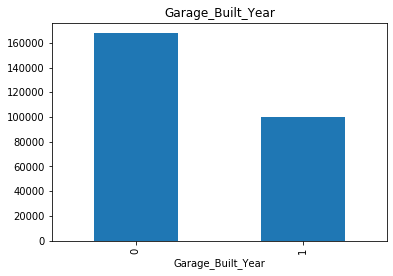

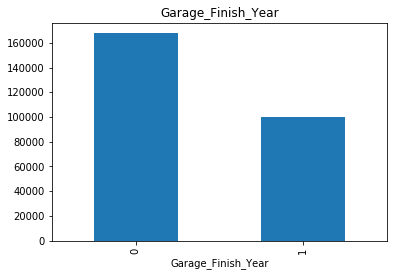

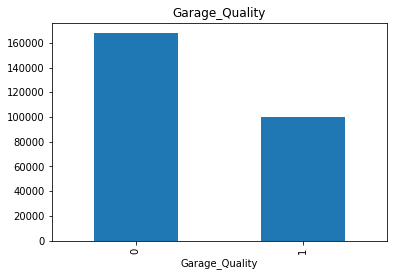

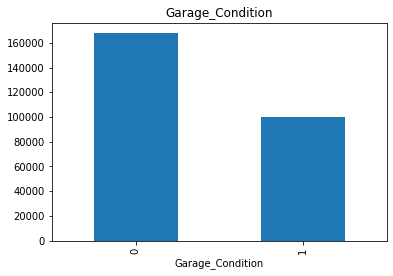

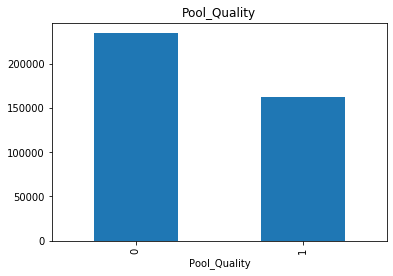

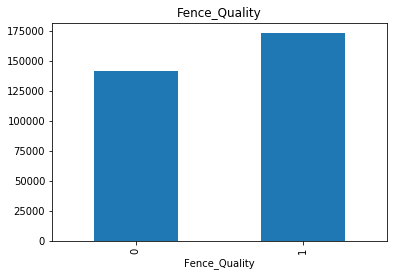

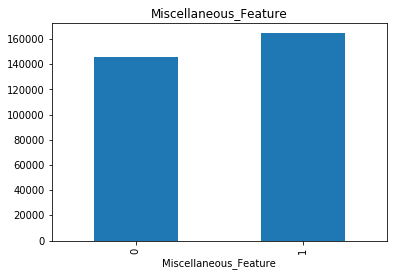

In [5]:
for feature in features_with_na:
    data=dataset.copy()
     # let's make a variable that indicates 1 if the observation was missing or zero otherwise
   
    data[feature]=np.where(data[feature].isnull(),1,0) 
   # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [6]:
# list of numerical variables
num_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

print('Number of num. variables:',len(num_features))

# visualise the numerical variables
dataset[num_features].head()

Number of num. variables: 38


,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [7]:
# list of variables that contain year information
year_feature = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Construction_Year', 'Remodel_Year', 'Garage_Built_Year', 'Year_Sold']

In [8]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

Construction_Year [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
Remodel_Year [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
Garage_Built_Year [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005

Text(0.5, 1.0, 'House Price vs YearSold')

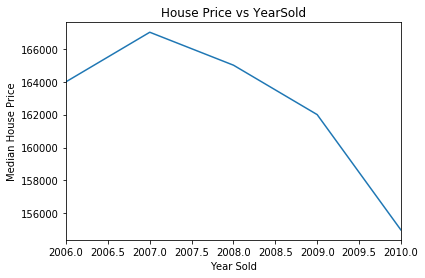

In [9]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('Year_Sold')['Sale_Price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

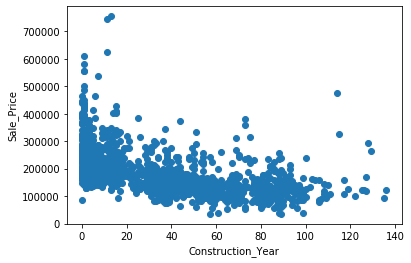

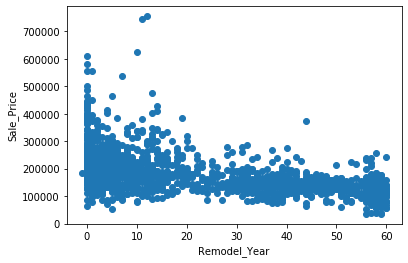

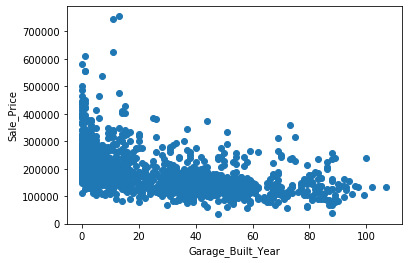

In [10]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='Year_Sold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['Year_Sold']-data[feature]

        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale_Price')
        plt.show()

In [11]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in num_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [12]:
dataset[discrete_feature].head()

,Building_Class,Overall_Material,House_Condition,LowQualFinSF,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Size,Three_Season_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


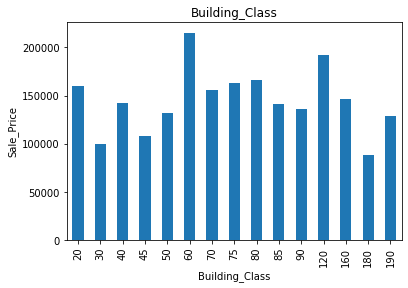

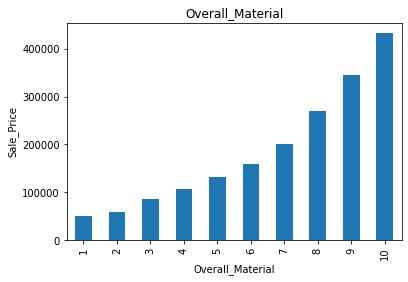

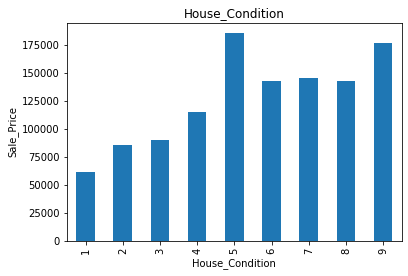

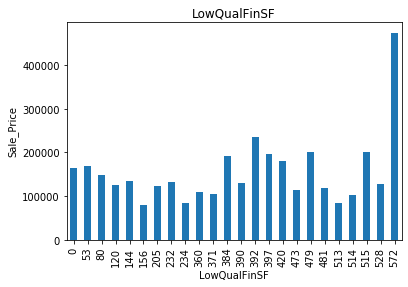

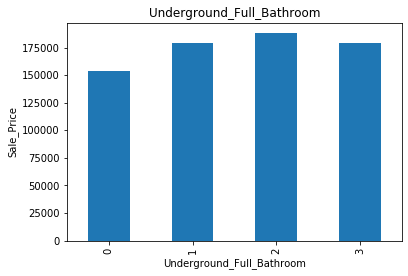

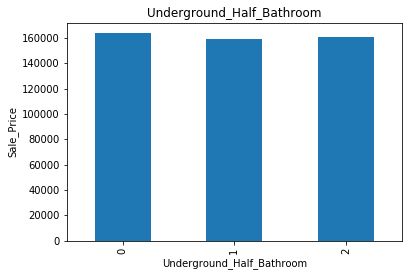

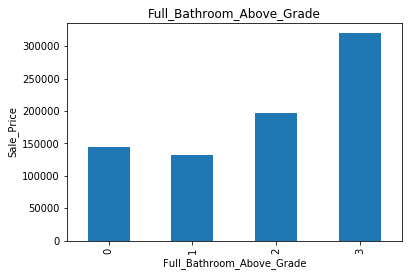

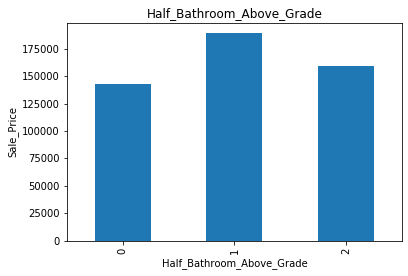

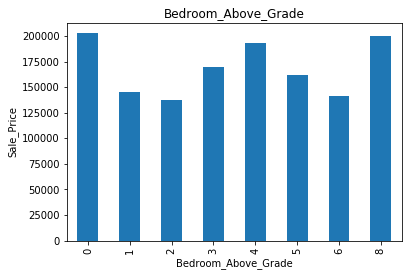

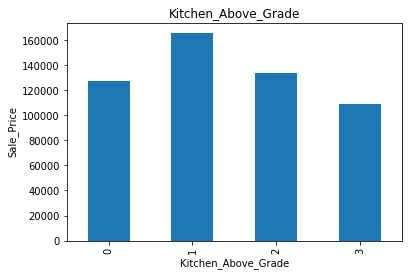

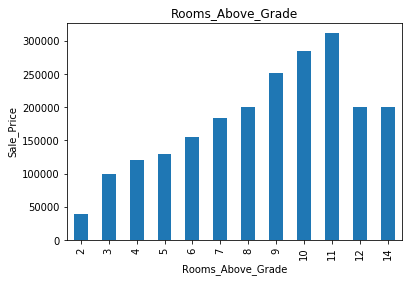

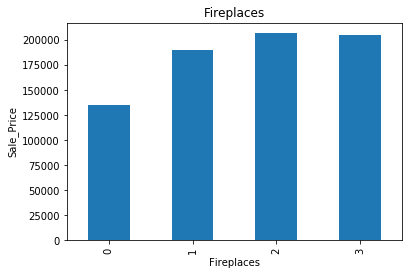

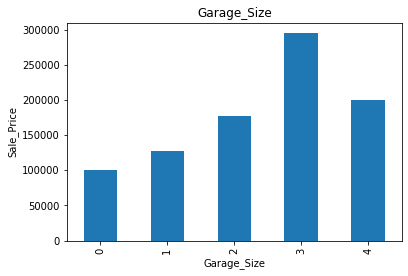

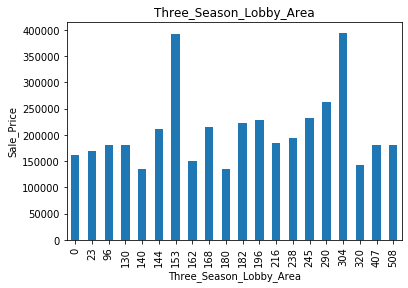

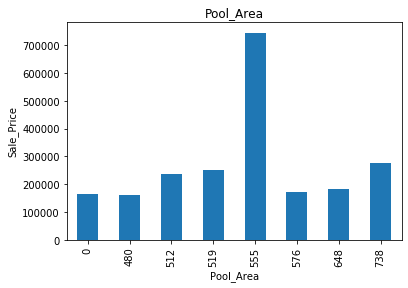

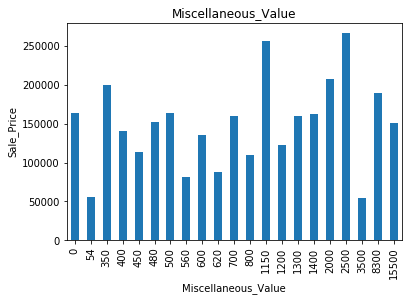

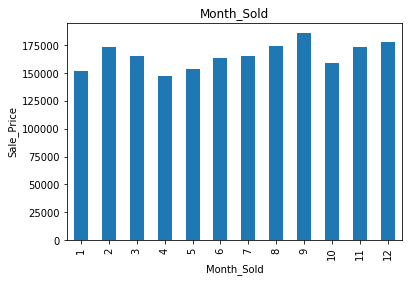

In [13]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

In [14]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 16


['Lot_Extent',
 'Lot_Size',
 'Brick_Veneer_Area',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Garage_Area',
 'W_Deck_Area',
 'Open_Lobby_Area',
 'Enclosed_Lobby_Area',
 'Screen_Lobby_Area',
 'Sale_Price']

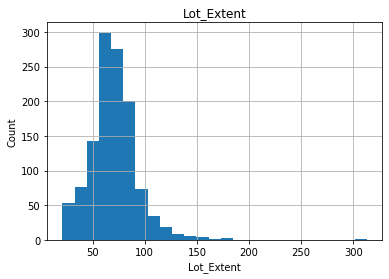

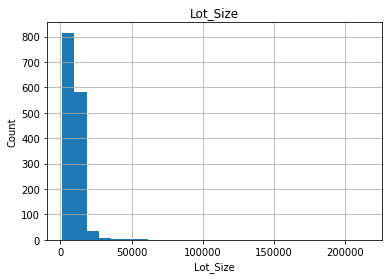

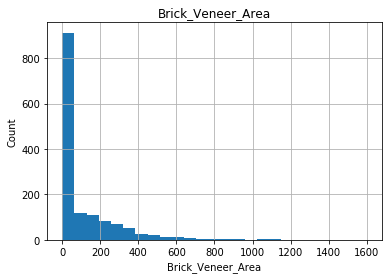

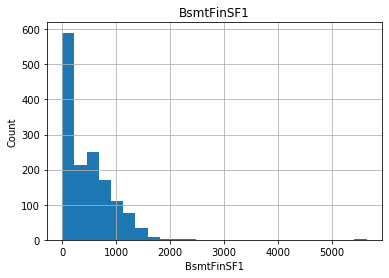

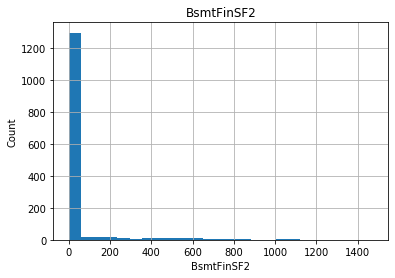

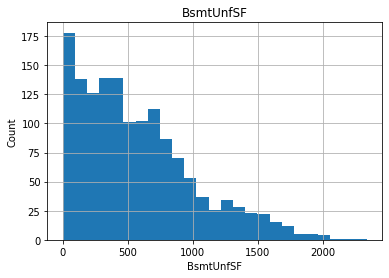

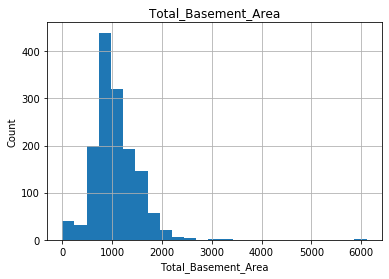

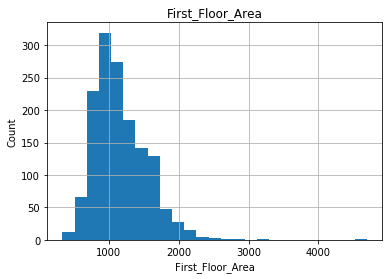

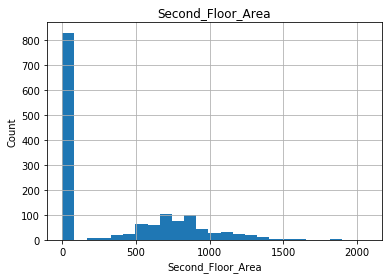

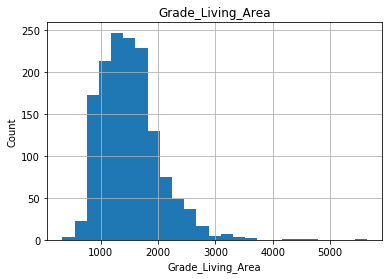

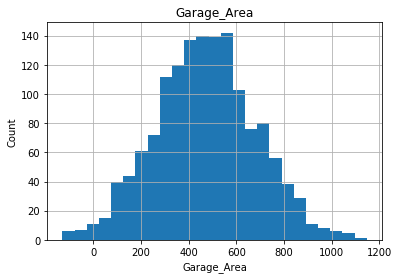

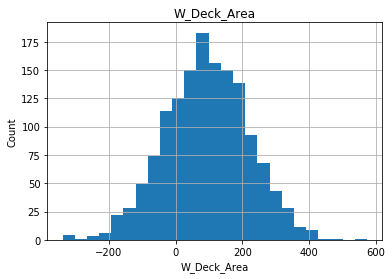

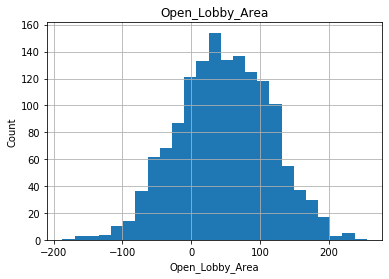

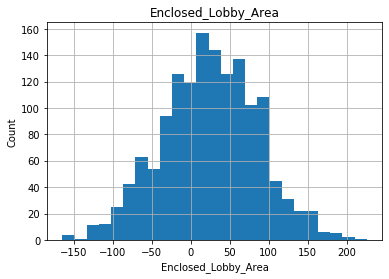

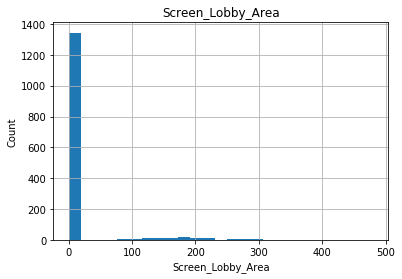

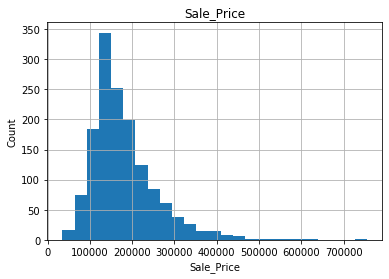

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## EDA2

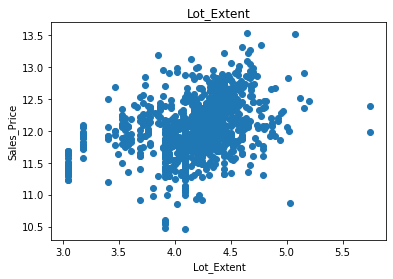

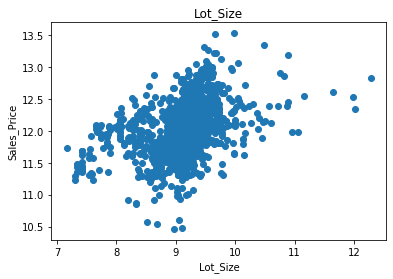

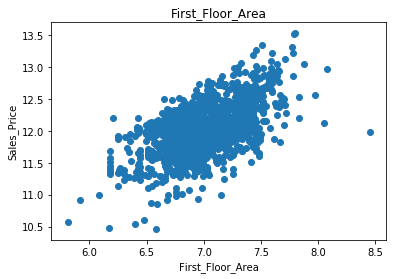

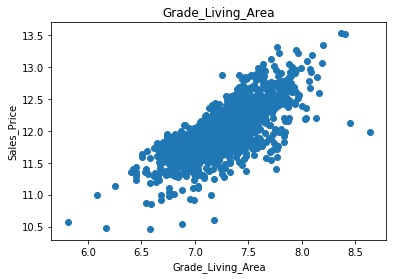

C:\Users\skyas\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


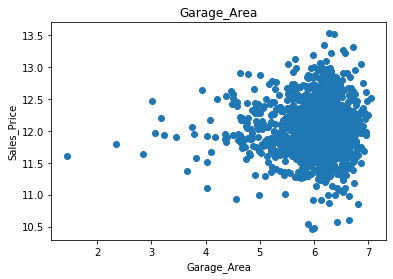

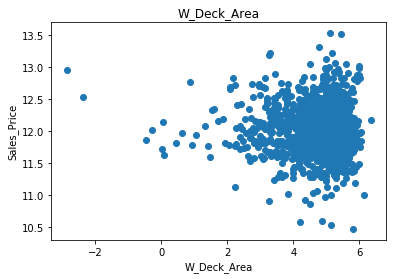

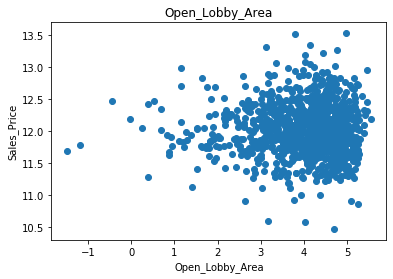

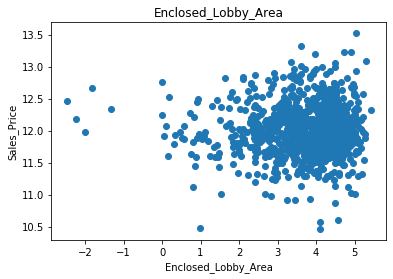

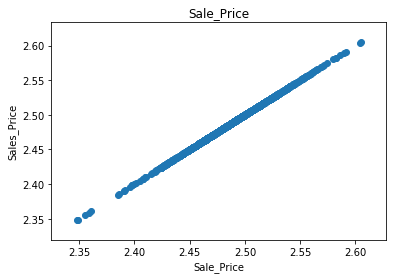

In [16]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Sale_Price']=np.log(data['Sale_Price'])
        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sales_Price')
        plt.title(feature)
        plt.show()

## Outliers

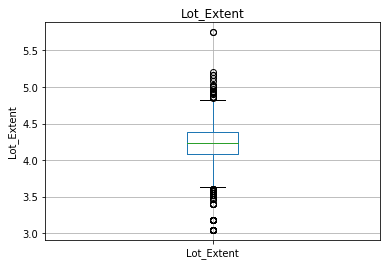

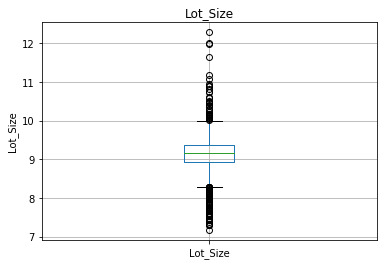

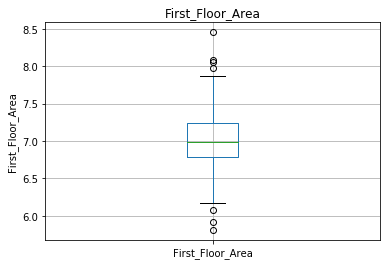

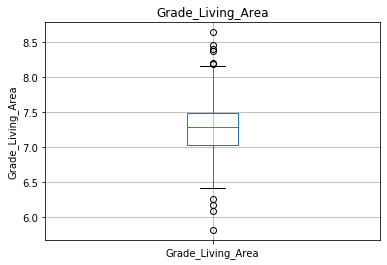

C:\Users\skyas\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


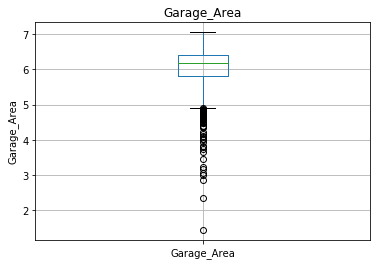

C:\Users\skyas\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


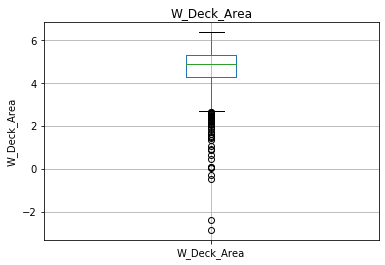

C:\Users\skyas\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


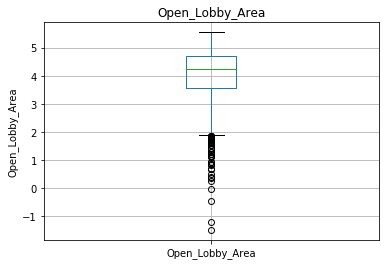

C:\Users\skyas\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


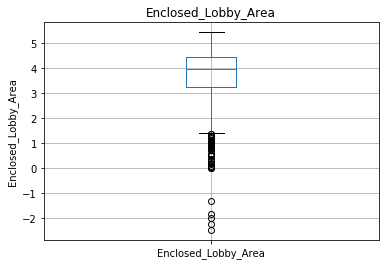

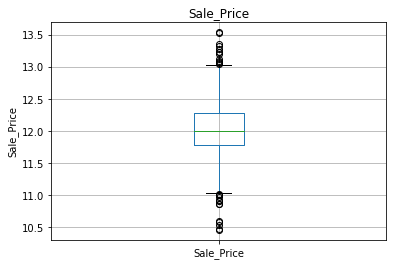

In [17]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [18]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
len(categorical_features)

43

In [19]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Zoning_Class and number of categories are 5
The feature is Road_Type and number of categories are 2
The feature is Lane_Type and number of categories are 3
The feature is Property_Shape and number of categories are 4
The feature is Land_Outline and number of categories are 4
The feature is Utility_Type and number of categories are 2
The feature is Lot_Configuration and number of categories are 5
The feature is Property_Slope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is House_Type and number of categories are 5
The feature is House_Design and number of categories are 8
The feature is Roof_Design and number of categories are 6
The feature is Roof_Quality and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16


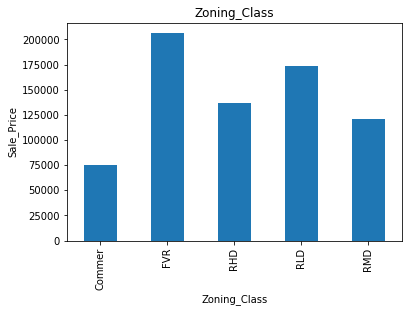

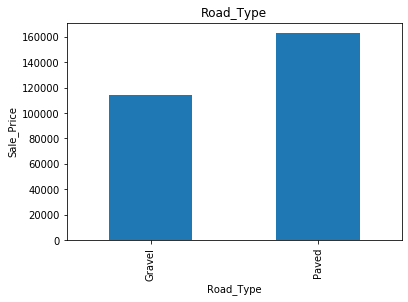

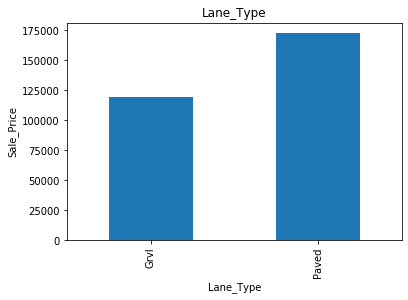

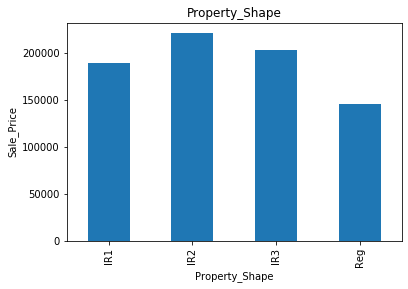

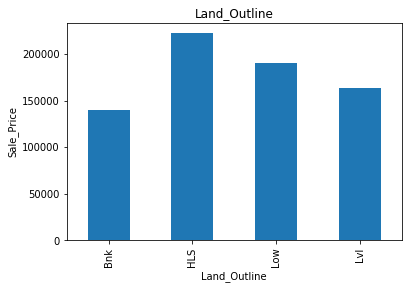

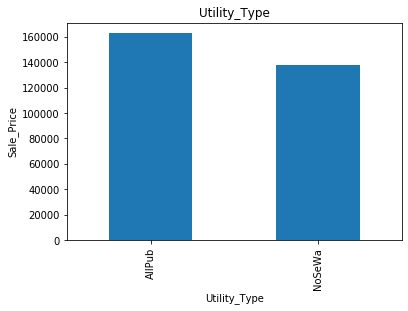

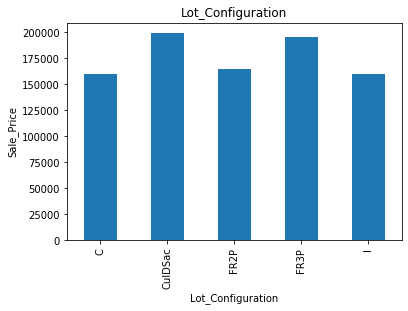

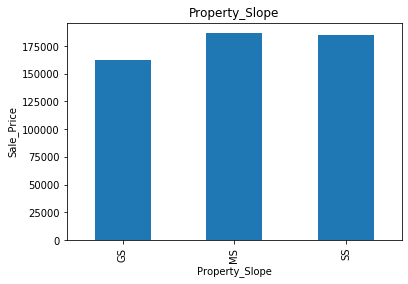

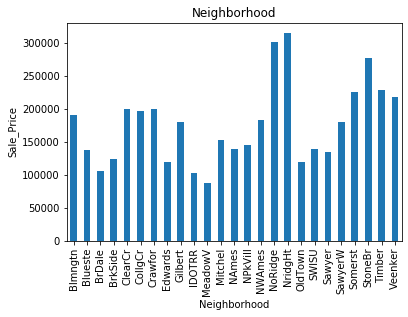

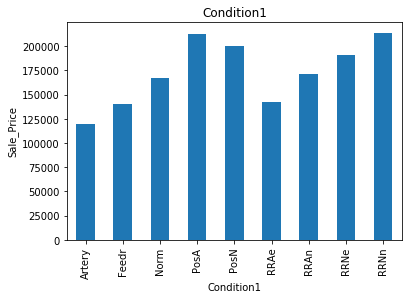

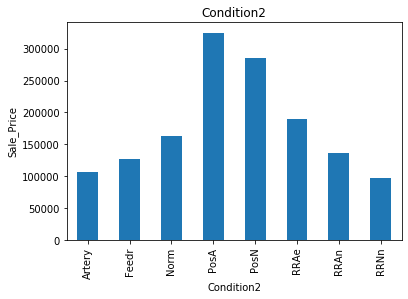

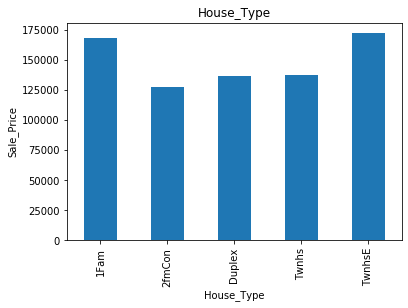

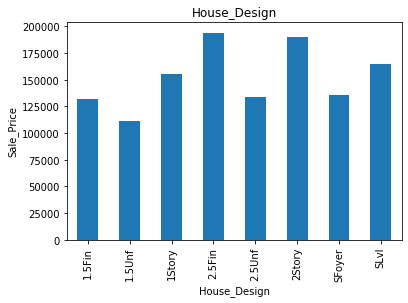

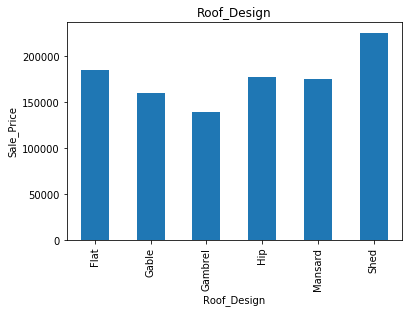

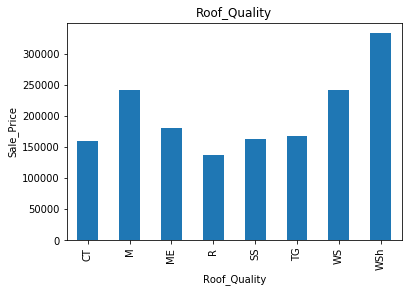

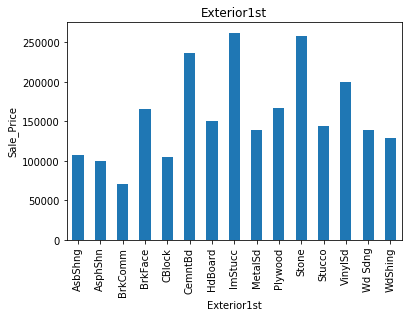

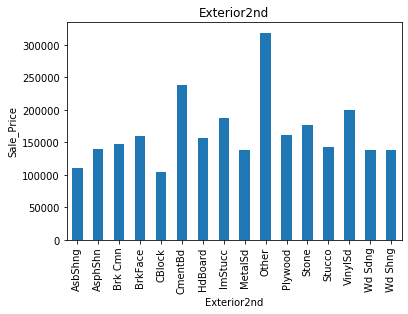

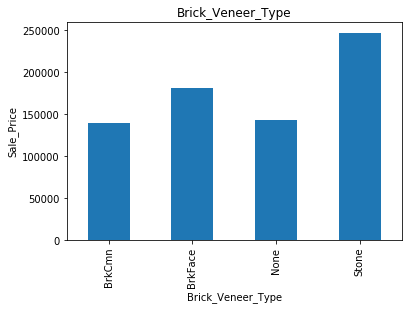

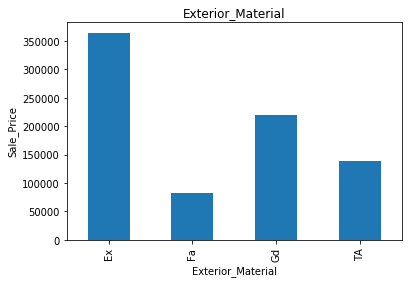

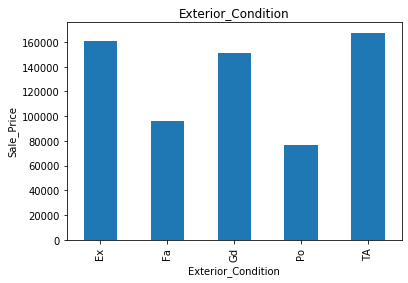

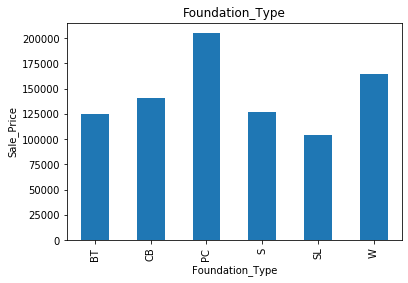

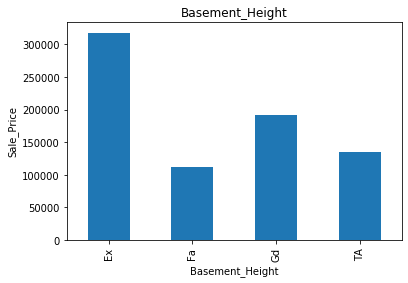

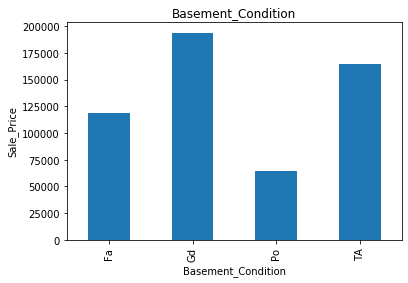

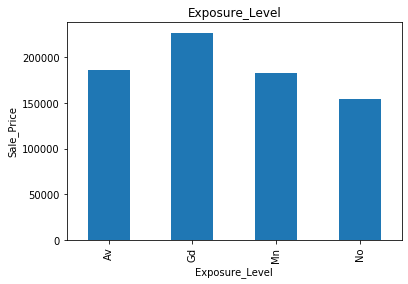

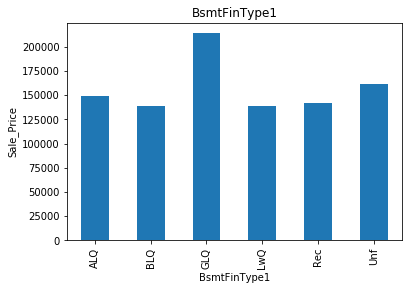

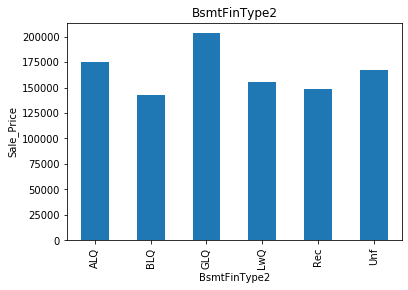

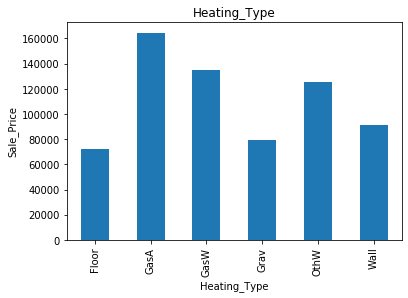

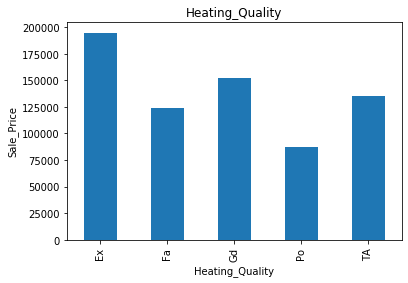

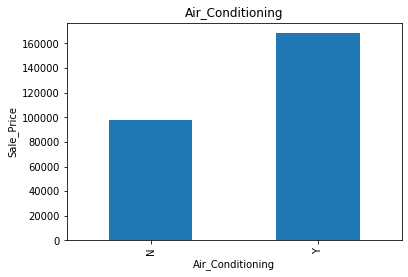

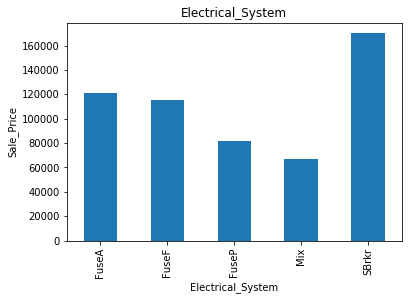

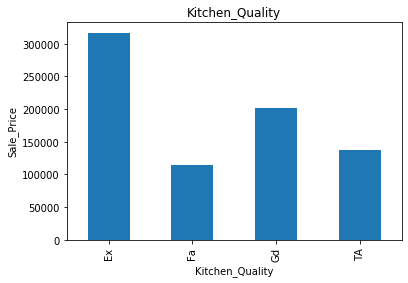

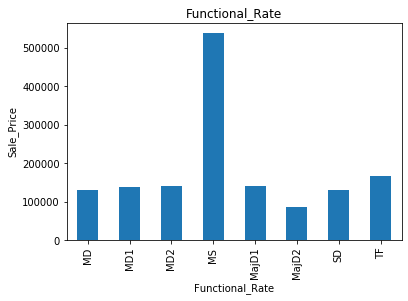

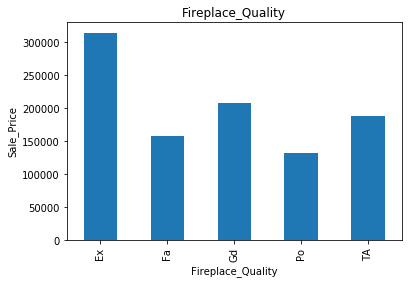

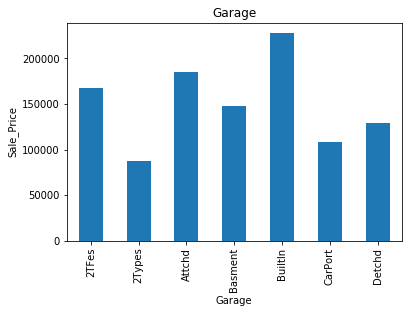

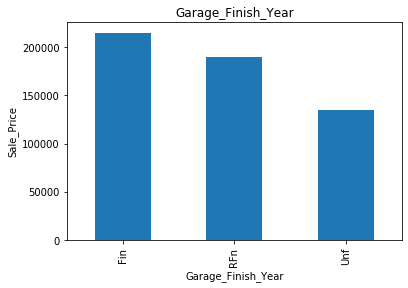

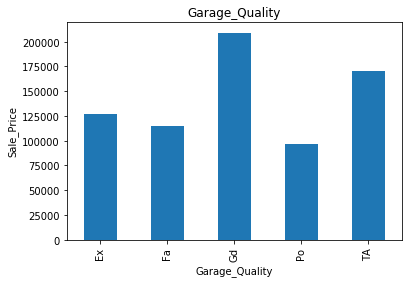

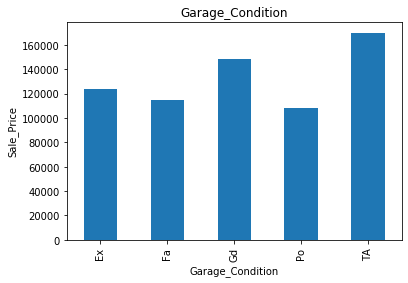

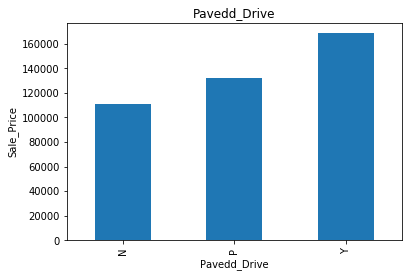

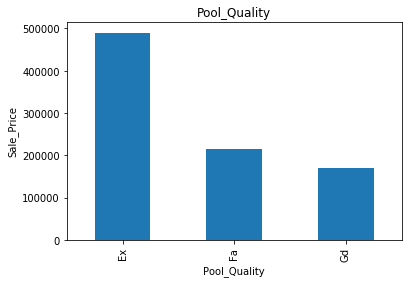

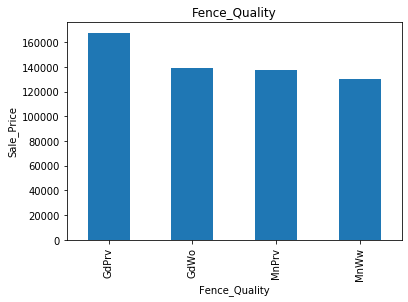

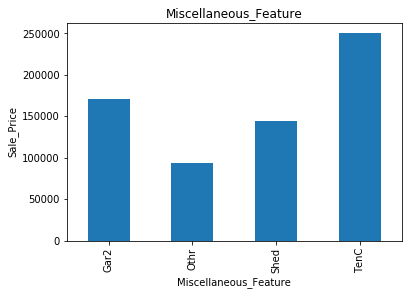

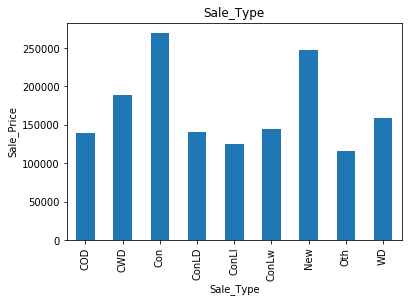

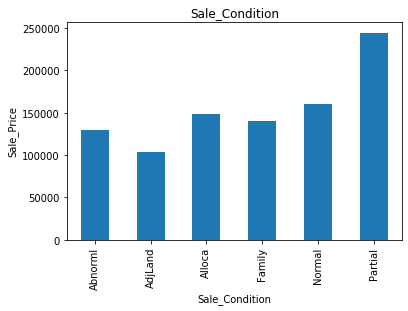

In [20]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale_Price')
    plt.title(feature)
    plt.show()

## Feature Engineering


In [21]:
dataset_train=pd.read_csv('Property_Price_Train.csv')
dataset_test=pd.read_csv('Property_Price_Test.csv')


In [22]:
# lets combine the data for data prep

dataset_test['Sale_Price']=1   #  Adding Taget Variable in Test Data for Data Preparation
dataset_train['data']='train'  # Adding Marking column in Data set , so that once we finished the marking we can diffeentiate 
                         # between Test and Train data
dataset_test['data']='test'
dataset_test=dataset_test[dataset_train.columns] ## To make the column ordering same
dataset=pd.concat([dataset_train,dataset_test],axis=0) # Row by Row Concat
print(dataset.shape)

(2918, 82)


## Missing Values

In [23]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)*100))

Zoning_Class: 0.13999999999999999% missing values
Lane_Type: 93.21000000000001% missing values
Utility_Type: 0.06999999999999999% missing values
Brick_Veneer_Type: 0.8200000000000001% missing values
Basement_Height: 2.78% missing values
Basement_Condition: 2.81% missing values
Exposure_Level: 2.81% missing values
BsmtFinType1: 2.71% missing values
BsmtFinType2: 2.74% missing values
Functional_Rate: 0.06999999999999999% missing values
Fireplace_Quality: 48.63% missing values
Garage: 5.38% missing values
Garage_Finish_Year: 5.45% missing values
Garage_Quality: 5.45% missing values
Garage_Condition: 5.45% missing values
Pool_Quality: 99.66000000000001% missing values
Fence_Quality: 80.43% missing values
Miscellaneous_Feature: 96.39999999999999% missing values


In [24]:
## deleting the columns which have missing value > 50%
dataset.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],inplace=True,axis=1)
   

In [25]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)*100))

Zoning_Class: 0.13999999999999999% missing values
Utility_Type: 0.06999999999999999% missing values
Brick_Veneer_Type: 0.8200000000000001% missing values
Basement_Height: 2.78% missing values
Basement_Condition: 2.81% missing values
Exposure_Level: 2.81% missing values
BsmtFinType1: 2.71% missing values
BsmtFinType2: 2.74% missing values
Functional_Rate: 0.06999999999999999% missing values
Fireplace_Quality: 48.63% missing values
Garage: 5.38% missing values
Garage_Finish_Year: 5.45% missing values
Garage_Quality: 5.45% missing values
Garage_Condition: 5.45% missing values


In [26]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Zoning_Class          0
Utility_Type          0
Brick_Veneer_Type     0
Basement_Height       0
Basement_Condition    0
Exposure_Level        0
BsmtFinType1          0
BsmtFinType2          0
Functional_Rate       0
Fireplace_Quality     0
Garage                0
Garage_Finish_Year    0
Garage_Quality        0
Garage_Condition      0
dtype: int64

In [27]:
dataset.shape

(2918, 78)

In [28]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)*100))

Lot_Extent: 16.66% missing value
Brick_Veneer_Area: 0.79% missing value
Underground_Full_Bathroom: 0.06999999999999999% missing value
Underground_Half_Bathroom: 0.06999999999999999% missing value
Garage_Built_Year: 5.45% missing value


In [29]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers median should be of train dataset
    median_value=dataset_train[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'_nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

Lot_Extent                   0
Brick_Veneer_Area            0
Underground_Full_Bathroom    0
Underground_Half_Bathroom    0
Garage_Built_Year            0
dtype: int64

In [30]:
dataset.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,data,Lot_Extent_nan,Brick_Veneer_Area_nan,Underground_Full_Bathroom_nan,Underground_Half_Bathroom_nan,Garage_Built_Year_nan
0,1,60,RLD,65.0,8450.0,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,missing,Attchd,2003.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal,208500,train,0,0,0,0,0
1,2,20,RLD,80.0,9600.0,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal,181500,train,0,0,0,0,0
2,3,60,RLD,68.0,11250.0,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,WD,Normal,223500,train,0,0,0,0,0
3,4,70,RLD,60.0,9550.0,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000,train,0,0,0,0,0
4,5,60,RLD,84.0,14260.0,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,WD,Normal,250000,train,0,0,0,0,0


In [31]:
## Temporal Variables (Date Time Variables)

for feature in year_feature:
       
    dataset[feature]=dataset['Year_Sold']-dataset[feature]

In [32]:

dataset.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,data,Lot_Extent_nan,Brick_Veneer_Area_nan,Underground_Full_Bathroom_nan,Underground_Half_Bathroom_nan,Garage_Built_Year_nan
0,1,60,RLD,65.0,8450.0,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,missing,Attchd,5.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,0,2,0,WD,Normal,208500,train,0,0,0,0,0
1,2,20,RLD,80.0,9600.0,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,31.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,0,5,0,WD,Normal,181500,train,0,0,0,0,0
2,3,60,RLD,68.0,11250.0,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,7.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,0,9,0,WD,Normal,223500,train,0,0,0,0,0
3,4,70,RLD,60.0,9550.0,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,8.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,0,2,0,WD,Abnorml,140000,train,0,0,0,0,0
4,5,60,RLD,84.0,14260.0,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,8.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,0,12,0,WD,Normal,250000,train,0,0,0,0,0


# Numerical Variables
### Handeling -ve value

In [33]:
dataset1=dataset.copy()
for feature in num_features:
    dataset1[feature]=np.square(dataset1[feature])
    dataset1[feature]=np.sqrt(dataset1[feature])

## Outliers 

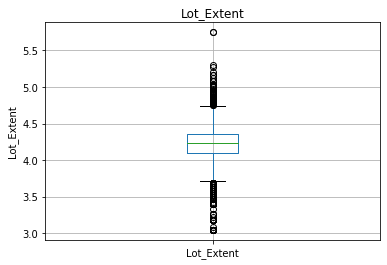

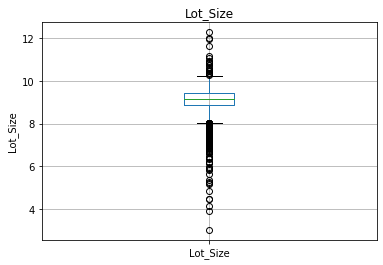

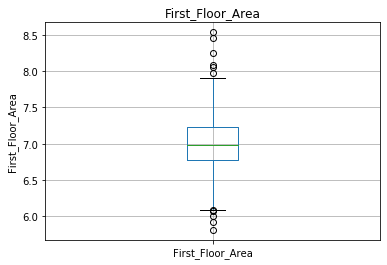

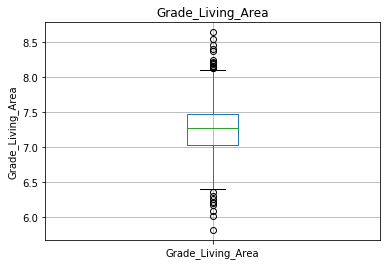

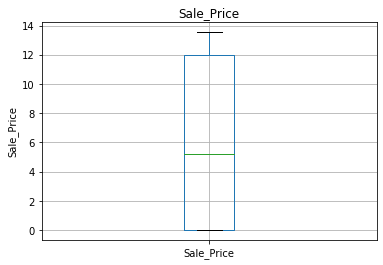

In [34]:
data2=dataset1.copy()
for feature in continuous_feature:
    if 0 in data2[feature].unique():
        pass
    else:
        data2[feature]=np.log(dataset1[feature])
        data2.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## Dummy variables 


In [35]:
data3=data2.copy()
factc=[feature for feature in data3.columns if data3[feature].dtypes=='O' and feature not in ['data']]
data3.shape
factc

['Zoning_Class',
 'Road_Type',
 'Property_Shape',
 'Land_Outline',
 'Utility_Type',
 'Lot_Configuration',
 'Property_Slope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'House_Type',
 'House_Design',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Type',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Basement_Condition',
 'Exposure_Level',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating_Type',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'Kitchen_Quality',
 'Functional_Rate',
 'Fireplace_Quality',
 'Garage',
 'Garage_Finish_Year',
 'Garage_Quality',
 'Garage_Condition',
 'Pavedd_Drive',
 'Sale_Type',
 'Sale_Condition']

In [36]:
# User defined function for creating dummies
#ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much .


for col in factc:
    freqs=data3[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        data3[name]=(data3[col]==cat).astype(int)
    del data3[col]
    print(col)
    

Zoning_Class
Road_Type
Property_Shape
Land_Outline
Utility_Type
Lot_Configuration
Property_Slope
Neighborhood
Condition1
Condition2
House_Type
House_Design
Roof_Design
Roof_Quality
Exterior1st
Exterior2nd
Brick_Veneer_Type
Exterior_Material
Exterior_Condition
Foundation_Type
Basement_Height
Basement_Condition
Exposure_Level
BsmtFinType1
BsmtFinType2
Heating_Type
Heating_Quality
Air_Conditioning
Electrical_System
Kitchen_Quality
Functional_Rate
Fireplace_Quality
Garage
Garage_Finish_Year
Garage_Quality
Garage_Condition
Pavedd_Drive
Sale_Type
Sale_Condition


In [37]:
data3.shape

(2918, 193)

In [38]:
data3.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price,data,Lot_Extent_nan,Brick_Veneer_Area_nan,Underground_Full_Bathroom_nan,Underground_Half_Bathroom_nan,Garage_Built_Year_nan,Zoning_Class_RLD,Zoning_Class_RMD,Zoning_Class_FVR,Zoning_Class_RHD,Property_Shape_Reg,Property_Shape_IR1,Land_Outline_Lvl,Land_Outline_HLS,Land_Outline_Bnk,Lot_Configuration_I,Lot_Configuration_C,Lot_Configuration_CulDSac,Property_Slope_GS,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NWAmes,Neighborhood_SawyerW,Neighborhood_Mitchel,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_Timber,Neighborhood_NoRidge,Neighborhood_StoneBr,Neighborhood_SWISU,Neighborhood_ClearCr,Neighborhood_MeadowV,Neighborhood_BrDale,Neighborhood_Blmngtn,Neighborhood_Veenker,Condition1_Norm,Condition1_NoRMD,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition2_Norm,House_Type_1Fam,House_Type_TwnhsE,House_Type_Duplex,House_Type_Twnhs,House_Design_1Story,House_Design_2Story,House_Design_1.5Fin,House_Design_SLvl,House_Design_SFoyer,Roof_Design_Gable,Roof_Design_Hip,Roof_Quality_SS,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_AsbShng,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Brick_Veneer_Type_None,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_Stone,Brick_Veneer_Type_BrkCmn,Exterior_Material_TA,Exterior_Material_Gd,Exterior_Material_Ex,Exterior_Condition_TA,Exterior_Condition_Gd,Foundation_Type_PC,Foundation_Type_CB,Foundation_Type_BT,Basement_Height_TA,Basement_Height_Gd,Basement_Height_Ex,Basement_Height_Fa,Basement_Condition_TA,Basement_Condition_Gd,Basement_Condition_Fa,Exposure_Level_No,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_missing,BsmtFinType2_BLQ,BsmtFinType2_ALQ,Heating_Type_GasA,Heating_Quality_Ex,Heating_Quality_TA,Heating_Quality_Gd,Air_Conditioning_Y,Electrical_System_SBrkr,Electrical_System_FuseA,Kitchen_Quality_TA,Kitchen_Quality_Gd,Kitchen_Quality_Ex,Functional_Rate_TF,Functional_Rate_MD2,Fireplace_Quality_missing,Fireplace_Quality_Gd,Fireplace_Quality_TA,Fireplace_Quality_Fa,Fireplace_Quality_Po,Garage_Attchd,Garage_Detchd,Garage_BuiltIn,Garage_missing,Garage_Finish_Year_Unf,Garage_Finish_Year_RFn,Garage_Finish_Year_Fin,Garage_Quality_TA,Garage_Quality_missing,Garage_Quality_Fa,Garage_Condition_TA,Garage_Condition_missing,Pavedd_Drive_Y,Pavedd_Drive_N,Sale_Type_WD,Sale_Type_New,Sale_Type_COD,Sale_Condition_Normal,Sale_Condition_Partial,Sale_Condition_NoRMDal,Sale_Condition_Abnorml,Sale_Condition_Family,Sale_Condition_AbnoRMDl
0,1.0,60.0,4.174387,9.041922,7.0,5.0,5.0,5.0,196.0,706.0,0.0,150.0,856.0,6.752270,854.0,0.0,7.444249,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,5.0,2.0,1085.793744,163.788080,69.596115,20.337934,0.0,0.0,0.0,0.0,2.0,0.0,12.247694,train,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,

## Feature Scaling

In [39]:
feature_scale=[feature for feature in data3.columns if feature not in ['Id','Sale_Price','data'] ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data3[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
scaler.transform(data3[feature_scale])

array([[0.23529412, 0.41820812, 0.6504374 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.49506375, 0.66421393, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.434909  , 0.6813384 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.75162522, 0.63564014, ..., 1.        , 0.        ,
        0.        ],
       [0.38235294, 0.40071794, 0.50529588, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.46620707, 0.61793475, ..., 0.        , 0.        ,
        0.        ]])

In [41]:
# transform the train and test set, and add on the Id and SalePrice variables
data4 = pd.concat([data3[['Id', 'Sale_Price','data']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data3[feature_scale]), columns=feature_scale)],
                    axis=1)

In [42]:
data4.shape

(2918, 193)

In [43]:
# Separate the Train and Test Data
train=data4[data4['data']=='train']
del train['data']
test=data4[data4['data']=='test']
test.drop(['Sale_Price','data'],axis=1,inplace=True)
train.head()


C:\Users\skyas\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,Sale_Price,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Lot_Extent_nan,Brick_Veneer_Area_nan,Underground_Full_Bathroom_nan,Underground_Half_Bathroom_nan,Garage_Built_Year_nan,Zoning_Class_RLD,Zoning_Class_RMD,Zoning_Class_FVR,Zoning_Class_RHD,Property_Shape_Reg,Property_Shape_IR1,Land_Outline_Lvl,Land_Outline_HLS,Land_Outline_Bnk,Lot_Configuration_I,Lot_Configuration_C,Lot_Configuration_CulDSac,Property_Slope_GS,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NWAmes,Neighborhood_SawyerW,Neighborhood_Mitchel,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_Timber,Neighborhood_NoRidge,Neighborhood_StoneBr,Neighborhood_SWISU,Neighborhood_ClearCr,Neighborhood_MeadowV,Neighborhood_BrDale,Neighborhood_Blmngtn,Neighborhood_Veenker,Condition1_Norm,Condition1_NoRMD,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition2_Norm,House_Type_1Fam,House_Type_TwnhsE,House_Type_Duplex,House_Type_Twnhs,House_Design_1Story,House_Design_2Story,House_Design_1.5Fin,House_Design_SLvl,House_Design_SFoyer,Roof_Design_Gable,Roof_Design_Hip,Roof_Quality_SS,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_AsbShng,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Brick_Veneer_Type_None,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_Stone,Brick_Veneer_Type_BrkCmn,Exterior_Material_TA,Exterior_Material_Gd,Exterior_Material_Ex,Exterior_Condition_TA,Exterior_Condition_Gd,Foundation_Type_PC,Foundation_Type_CB,Foundation_Type_BT,Basement_Height_TA,Basement_Height_Gd,Basement_Height_Ex,Basement_Height_Fa,Basement_Condition_TA,Basement_Condition_Gd,Basement_Condition_Fa,Exposure_Level_No,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType2_Unf,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_missing,BsmtFinType2_BLQ,BsmtFinType2_ALQ,Heating_Type_GasA,Heating_Quality_Ex,Heating_Quality_TA,Heating_Quality_Gd,Air_Conditioning_Y,Electrical_System_SBrkr,Electrical_System_FuseA,Kitchen_Quality_TA,Kitchen_Quality_Gd,Kitchen_Quality_Ex,Functional_Rate_TF,Functional_Rate_MD2,Fireplace_Quality_missing,Fireplace_Quality_Gd,Fireplace_Quality_TA,Fireplace_Quality_Fa,Fireplace_Quality_Po,Garage_Attchd,Garage_Detchd,Garage_BuiltIn,Garage_missing,Garage_Finish_Year_Unf,Garage_Finish_Year_RFn,Garage_Finish_Year_Fin,Garage_Quality_TA,Garage_Quality_missing,Garage_Quality_Fa,Garage_Condition_TA,Garage_Condition_missing,Pavedd_Drive_Y,Pavedd_Drive_N,Sale_Type_WD,Sale_Type_New,Sale_Type_COD,Sale_Condition_Normal,Sale_Condition_Partial,Sale_Condition_NoRMDal,Sale_Condition_Abnorml,Sale_Condition_Family,Sale_Condition_AbnoRMDl
0,1.0,12.247694,0.235294,0.418208,0.650437,0.666667,0.500,0.036765,0.083333,0.12250,0.125089,0.0,0.064212,0.140098,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.025,0.4,0.729700,0.115020,0.093795,0.020097,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [44]:
train.shape,test.shape,test.isnull().sum().sum()

((1459, 192), (1459, 191), 6)

In [45]:
test.dropna(inplace=True)

C:\Users\skyas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
test.isnull().sum().sum()

0

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,train['Sale_Price'],test_size=0.3,random_state=0)

In [48]:
X_train.shape,X_test.shape

((1021, 192), (438, 192))

In [49]:
x_train=X_train.drop(['Sale_Price','Id'],axis=1)
y_train=X_train['Sale_Price']

In [50]:
x_test=X_test.drop(['Sale_Price','Id'],axis=1)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm=LinearRegression()

In [53]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
predicted_ir=lm.predict(x_test)

In [55]:
from sklearn.metrics import mean_absolute_error


In [56]:
mean_absolute_error(X_test['Sale_Price'],predicted_ir)


0.0907337693300581

##### We know the tentative performance now, lets build the model on entire training to make prediction on test/production

In [57]:
x=train.drop(['Sale_Price','Id'],axis=1)
y=train['Sale_Price']
testdata=test.drop(['Id'],axis=1)

In [58]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
pred=lm.predict(testdata)

## Ridge Regression

In [60]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [61]:
lambdas=np.linspace(1,100,100)

In [62]:
params={'alpha':lambdas}

In [63]:
model=Ridge(fit_intercept=True)

In [64]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,...
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.]

In [66]:
grid_search.best_estimator_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009283,0.006669,0.000800,0.002400,1,{'alpha': 1.0},-0.101943,-0.103467,-0.087637,-0.095170,-0.090265,-0.088073,-0.098783,-0.089428,-0.081169,-0.076111,-0.091215,0.008333,1
1,0.006287,0.006818,0.001273,0.002649,2,{'alpha': 2.0},-0.101373,-0.104296,-0.086308,-0.095767,-0.090398,-0.090139,-0.098783,-0.089578,-0.079903,-0.077470,-0.091411,0.008353,2
2,0.006238,0.007640,0.000000,0.000000,3,{'alpha': 3.0},-0.101479,-0.104447,-0.085748,-0.096959,-0.090810,-0.091976,-0.099112,-0.089318,-0.080086,-0.078569,-0.091860,0.008307,3
3,0.006900,0.007365,0.001563,0.004690,4,{'alpha': 4.0},-0.101710,-0.104763,-0.085400,-0.098264,-0.091214,-0.093993,-0.099309,-0.089221,-0.080375,-0.079515,-0.092386,0.008340,4
4,0.006899,0.007365,0.000000,0.000000,5,{'alpha': 5.0},-0.102106,-0.105133,-0.085505,-0.099765,-0.091977,-0.095850,-0.099797,-0.089076,-0.080795,-0.080427,-0.093052,0.008426,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.005257,0.004368,0.001002,0.002409,96,{'alpha': 96.0},-0.134297,-0.146313,-0.106241,-0.137538,-0.127923,-0.154011,-0.121581,-0.107672,-0.111871,-0.114236,-0.126176,0.015763,96
96,0.004428,0.004298,0.000000,0.000000,97,{'alpha': 97.0},-0.134477,-0.146574,-0.106391,-0.137694,-0.128138,-0.154269,-0.121676,-0.107837,-0.112069,-0.114431,-0.126363,0.015791,97
97,0.005039,0.003959,0.000206,0.000607,98,{'alpha': 98.0},-0.134654,-0.146832,-0.106544,-0.137847,-0.128374,-0.154524,-0.121770,-0.108000,-0.112264,-0.114624,-0.126551,0.015818,98
98,0.004444,0.004671,0.000806,0.002418,99,{'alpha': 99.0},-0.134830,-0.147087,-0.106697,-0.137998,-0.128616,-0.154775,-0.121862,-0.108162,-0.112457,-0.114815,-0.126738,0.015845,99


In [68]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [69]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.09121 (std: 0.00833)
Parameters: {'alpha': 1.0}

Model with rank: 2
Mean validation score: -0.09141 (std: 0.00835)
Parameters: {'alpha': 2.0}

Model with rank: 3
Mean validation score: -0.09186 (std: 0.00831)
Parameters: {'alpha': 3.0}

Model with rank: 4
Mean validation score: -0.09239 (std: 0.00834)
Parameters: {'alpha': 4.0}

Model with rank: 5
Mean validation score: -0.09305 (std: 0.00843)
Parameters: {'alpha': 5.0}



In [70]:
test_pred=grid_search.predict(x_test)

In [71]:
mean_absolute_error(X_test['Sale_Price'],test_pred)


0.08964195853453089

## Lasso Regression

In [72]:
lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [73]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [74]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.5454...
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolu

In [75]:
grid_search.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### we can see that, the best value of alpha comes at the edge of the range that we tried , we should expand the trial range on that side and run this again

In [76]:
lambdas=np.linspace(.0001,1,100)
params={'alpha':lambdas}

In [77]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.07...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [78]:
grid_search.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -0.08855 (std: 0.00831)
Parameters: {'alpha': 0.0001}

Model with rank: 2
Mean validation score: -0.14021 (std: 0.01420)
Parameters: {'alpha': 0.010199999999999999}

Model with rank: 3
Mean validation score: -0.18336 (std: 0.02059)
Parameters: {'alpha': 0.0203}

Model with rank: 4
Mean validation score: -0.19718 (std: 0.02209)
Parameters: {'alpha': 0.0304}

Model with rank: 5
Mean validation score: -0.20919 (std: 0.02355)
Parameters: {'alpha': 0.0405}



In [80]:
lasso_model=grid_search.best_estimator_

In [81]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
 test_pred=lasso_model.predict(x_test)

In [83]:
mean_absolute_error(X_test['Sale_Price'],test_pred)


0.08678722349037944

In [84]:
 test_pred=lasso_model.predict(testdata)

In [268]:
test_pred

array([11.63417496, 11.92879254, 11.99620674, ..., 11.92555221,
       11.56261619, 12.23500451])

#### We can write these to a csv file for submission like this :

In [269]:
pd.DataFrame(test_pred).to_csv("mysubmission_property_price.csv",index=False)